In [1]:
%pylab inline

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import data
import submit

In [3]:
koubei = data.koubei()

In [4]:
pred = data.pred()

In [5]:
kp = pd.merge(
    pred, koubei, on=['user_id', 'location_id'], how='inner'
)

In [6]:
kp.head()

,user_id,location_id,merchant_id,timestamp
0,427392,172,820,20151021
1,427392,172,820,20151024
2,427392,172,820,20151117
3,427392,172,820,20151126
4,427392,172,820,20151121


获取时间信息以得到用户对商品的喜好程度

In [7]:
from datetime import datetime as dt

In [8]:
days = lambda a, b: abs((dt.strptime(str(a), '%Y%m%d') - dt.strptime(str(b), '%Y%m%d')).days)

In [9]:
rkp = pd.merge(
    kp.groupby(['user_id', 'location_id', 'merchant_id']).agg(dict(timestamp=lambda d: sum(0.5+0.5*0.96**days(i, '20151201') for i in d))).reset_index(),
    kp.groupby(['user_id', 'location_id', 'merchant_id']).agg(dict(timestamp=len)).reset_index(),
    on=['user_id', 'location_id', 'merchant_id'], suffixes=['_agg', '_len']
)

In [10]:
rkp.head()

,user_id,location_id,merchant_id,timestamp_agg,timestamp_len
0,42,337,820,1.855724,2
1,89,188,7667,2.565938,4
2,97,84,3538,2.941781,5
3,206,83,2466,1.455327,2
4,206,83,2606,2.378041,3


In [12]:
rkp['time_agg_rank'] = rkp.groupby(['user_id', 'location_id']).timestamp_agg.rank(ascending=False, method='first')

In [13]:
rkp['len_rank'] = rkp.groupby(['user_id', 'location_id']).timestamp_len.rank(ascending=False, method='first')

In [14]:
rkp.head()

,user_id,location_id,merchant_id,timestamp_agg,timestamp_len,time_agg_rank,len_rank
0,42,337,820,1.855724,2,1,1
1,89,188,7667,2.565938,4,1,1
2,97,84,3538,2.941781,5,1,1
3,206,83,2466,1.455327,2,2,2
4,206,83,2606,2.378041,3,1,1


In [17]:
rrkp = rkp[rkp.time_agg_rank < 7]

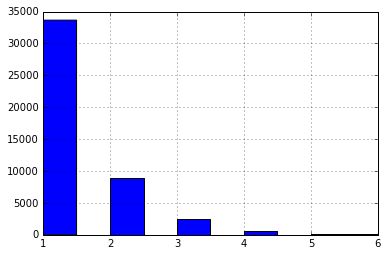

In [18]:
rrkp.groupby(['user_id', 'location_id']).size().hist();

In [19]:
rrkp.groupby(['user_id', 'location_id']).merchant_id.agg(lambda d: ':'.join([str(int(i)) for i in d])).to_csv('submit/0504.csv')

---------

In [20]:
rk = pd.merge(
    koubei.groupby(['user_id', 'location_id', 'merchant_id']).agg(dict(timestamp=lambda d: sum(0.5+0.5*0.96**days(i, '20151201') for i in d))).reset_index(),
    koubei.groupby(['user_id', 'location_id', 'merchant_id']).agg(dict(timestamp=len)).reset_index(),
    on=['user_id', 'location_id', 'merchant_id'], suffixes=['_agg', '_len']
)

In [21]:
rk.head()

,user_id,location_id,merchant_id,timestamp_agg,timestamp_len
0,4,254,3527,0.555159,1
1,22,371,4264,1.372361,2
2,38,272,820,1.381452,2
3,42,337,820,1.855724,2
4,46,348,9236,0.506085,1


In [22]:
rk['time_agg_rank'] = rk.groupby(['user_id', 'location_id']).timestamp_agg.rank(ascending=False, method='first')

In [23]:
rk['len_rank'] = rk.groupby(['user_id', 'location_id']).timestamp_len.rank(ascending=False, method='first')

In [25]:
rk.set_index('user_id').to_csv('model/koubei_time_agg_0504.csv')